In [1]:
# source:
# https://towardsdatascience.com/7-functions-you-can-use-to-create-new-columns-in-a-pandas-dataframe-a6b480cf8b30
# https://www.sefidian.com/2021/02/19/pivot-melt-stack-and-unstack-methods-in-pandas/

import numpy as np
import pandas as pd
import datetime as dt

#pd.options.display.max_columns = None
#pd.options.display.max_rows = None
#pd.options.display.float_format = '{:.4f}'.format   # 4 decimal places

In [2]:
df = pd.DataFrame({    "division": ["A", "B", "A", "C", "B"],
    "category": ["101-A", "14-C", "1020-D", "112-A", "11-A"],
    "date": pd.date_range(start='2022-09-01', end='2022-10-31', periods=5),
    "col1": np.random.randint(10, 70, size=5),
    "col2": np.random.randint(10, 30, size=5),
    "col3": np.random.randint(10, 100, size=5) 
})
df

,division,category,date,col1,col2,col3
0,A,101-A,2022-09-01,69,25,83
1,B,14-C,2022-09-16,10,28,36
2,A,1020-D,2022-10-01,38,29,61
3,C,112-A,2022-10-16,62,24,81
4,B,11-A,2022-10-31,59,19,72


In [3]:
# Pandas where --------------------------------------------------------------------------------------
# The where function of Pandas can be used for creating a column based on the values in other columns.
# We define a condition or a set of conditions and take a column. The values in this column remain the 
# same for the rows that fit the condition. The other values are replaced with the specified value.
df["col_updated"] = df["col1"].where(df["col2"] <= 50, df["col1"] + 10)

df[["col1", "col2", "col_updated"]]

,col1,col2,col_updated
0,69,25,69
1,10,28,10
2,38,29,38
3,62,24,62
4,59,19,59


In [4]:
# Numpy where --------------------------------------------------------------------------------------
# The where function of NumPy is more flexible than that of Pandas. We are able to assign a value for
# the rows that fit the given condition. This is not possible with the where function of Pandas as the 
# values that fit the condition remain the same.
df["col_updated_2"] = np.where( df["col2"] <= 50, 
                                df["col1"] - 10,
                                df["col1"] + 10)

df[["col1", "col2", "col_updated_2"]]

,col1,col2,col_updated_2
0,69,25,59
1,10,28,0
2,38,29,28
3,62,24,52
4,59,19,49


In [5]:
# Numpy select --------------------------------------------------------------------------------------
# The where function assigns a value based on one set of conditions. The select function takes it one 
# step further. It accepts multiple sets of conditions and is able to assign a different value for each set of conditions.
conditions = [  (df["division"] == "A") & (df["col1"] > 10),
                (df["division"] == "B") & (df["col1"] > 10)]

values = [1, 2]

df["select_col"] = np.select(conditions, values, default=0)
df[["division", "col1", "select_col"]]

,division,col1,select_col
0,A,69,1
1,B,10,0
2,A,38,1
3,C,62,0
4,B,59,2


In [6]:
# Pandas assign --------------------------------------------------------------------------------------
# The assign function of Pandas can be used for creating multiple columns in a single operation.
# We can derive columns based on the existing ones or create from scratch. If we do the latter, we need 
# to make sure the length of the variable is the same as the number of rows in the DataFrame
df = df.assign( cat1 = df["category"].str.split("-", expand=True)[0],
                col_all = lambda x: x.col1 ** 2 + x.col2 * 10 + x.col3,
                id = [1, 2, 3, 4, 5])

df

,division,category,date,col1,col2,col3,col_updated,col_updated_2,select_col,cat1,col_all,id
0,A,101-A,2022-09-01,69,25,83,69,59,1,101,5094,1
1,B,14-C,2022-09-16,10,28,36,10,0,0,14,416,2
2,A,1020-D,2022-10-01,38,29,61,38,28,1,1020,1795,3
3,C,112-A,2022-10-16,62,24,81,62,52,0,112,4165,4
4,B,11-A,2022-10-31,59,19,72,59,49,2,11,3743,5


In [7]:
# Pandas insert --------------------------------------------------------------------------------------
# When we create a new column to a DataFrame, it is added at the end so it becomes the last column.
# The insert function allows for specifying the location of the new column in terms of the column index
df.insert(0, "id2", [1, 2, 3, 4, 5])

df

,id2,division,category,date,col1,col2,col3,col_updated,col_updated_2,select_col,cat1,col_all,id
0,1,A,101-A,2022-09-01,69,25,83,69,59,1,101,5094,1
1,2,B,14-C,2022-09-16,10,28,36,10,0,0,14,416,2
2,3,A,1020-D,2022-10-01,38,29,61,38,28,1,1020,1795,3
3,4,C,112-A,2022-10-16,62,24,81,62,52,0,112,4165,4
4,5,B,11-A,2022-10-31,59,19,72,59,49,2,11,3743,5


In [8]:
# Pandas split --------------------------------------------------------------------------------------
# he split function is quite useful when working with textual data. Consider we have a text column that 
# contains multiple pieces of information. We can split it and create a separate column for each part.
df[["cat1","cat2"]] = df["category"].str.split("-", expand=True)

df[["category","cat1","cat2"]]

,category,cat1,cat2
0,101-A,101,A
1,14-C,14,C
2,1020-D,1020,D
3,112-A,112,A
4,11-A,11,A


In [9]:
# Pandas cat --------------------------------------------------------------------------------------
df.insert(3, "category2", df["cat1"].str.cat(df["cat2"], sep="|") )
df

,id2,division,category,category2,date,col1,col2,col3,col_updated,col_updated_2,select_col,cat1,col_all,id,cat2
0,1,A,101-A,101|A,2022-09-01,69,25,83,69,59,1,101,5094,1,A
1,2,B,14-C,14|C,2022-09-16,10,28,36,10,0,0,14,416,2,C
2,3,A,1020-D,1020|D,2022-10-01,38,29,61,38,28,1,1020,1795,3,D
3,4,C,112-A,112|A,2022-10-16,62,24,81,62,52,0,112,4165,4,A
4,5,B,11-A,11|A,2022-10-31,59,19,72,59,49,2,11,3743,5,A


In [23]:
# cut -----------------------------------------------------------------------------------------
df['col_all_bins'] = pd.cut( df['col_all'], bins= [0,1000,5000,float("Inf")], labels=['0_1k','1k_5k','5k+'])
df

,id2,division,category,category2,date,col1,col2,col3,col_updated,col_updated_2,select_col,cat1,col_all,id,cat2,col_all_bins
0,1,A,101-A,101|A,2022-09-01,69,25,83,69,59,1,101,5094,1,A,5k+
1,2,B,14-C,14|C,2022-09-16,10,28,36,10,0,0,14,416,2,C,0_1k
2,3,A,1020-D,1020|D,2022-10-01,38,29,61,38,28,1,1020,1795,3,D,1k_5k
3,4,C,112-A,112|A,2022-10-16,62,24,81,62,52,0,112,4165,4,A,1k_5k
4,5,B,11-A,11|A,2022-10-31,59,19,72,59,49,2,11,3743,5,A,1k_5k


In [10]:
# Unstack -----------------------------------------------------------------------------------------
df2 = df.copy()
df2.groupby('division')['cat2'].value_counts()

division  cat2
A         A       1
          D       1
B         A       1
          C       1
C         A       1
Name: cat2, dtype: int64

In [11]:
df2.groupby('division')['cat2'].value_counts().unstack().fillna(0)

cat2,A,C,D
division,,,
A,1.0,0.0,1.0
B,1.0,1.0,0.0
C,1.0,0.0,0.0


In [12]:
# diff() -----------------------------------------------------------------------------------------
# date difference by each division

df3 = df2[['id', 'category', 'division','date']].sort_values(by=['division','date'])
df3['time_diff'] = df3.groupby('division')['date'].diff()
df3

,id,category,division,date,time_diff
0,1,101-A,A,2022-09-01,NaT
2,3,1020-D,A,2022-10-01,30 days
1,2,14-C,B,2022-09-16,NaT
4,5,11-A,B,2022-10-31,45 days
3,4,112-A,C,2022-10-16,NaT


In [13]:
# cumsum + cumcount -------------------------------------------------------------------------------
# the cumulative by a specific column
df3 = df2[['id', 'category', 'cat2','date', 'col1']].sort_values(by=['cat2','date'])
df3['cumcol1'] = df3.groupby('cat2')['col1'].cumsum()
df3['countcat2'] = df3.groupby('cat2').cumcount()
df3

,id,category,cat2,date,col1,cumcol1,countcat2
0,1,101-A,A,2022-09-01,69,69,0
3,4,112-A,A,2022-10-16,62,131,1
4,5,11-A,A,2022-10-31,59,190,2
1,2,14-C,C,2022-09-16,10,10,0
2,3,1020-D,D,2022-10-01,38,38,0


In [14]:
# nsmallest + nlargest -----------------------------------------------------------------------------
df.nsmallest(3, 'col1')

,id2,division,category,category2,date,col1,col2,col3,col_updated,col_updated_2,select_col,cat1,col_all,id,cat2
1,2,B,14-C,14|C,2022-09-16,10,28,36,10,0,0,14,416,2,C
2,3,A,1020-D,1020|D,2022-10-01,38,29,61,38,28,1,1020,1795,3,D
4,5,B,11-A,11|A,2022-10-31,59,19,72,59,49,2,11,3743,5,A


In [15]:
df.nlargest(2, 'col2')

,id2,division,category,category2,date,col1,col2,col3,col_updated,col_updated_2,select_col,cat1,col_all,id,cat2
2,3,A,1020-D,1020|D,2022-10-01,38,29,61,38,28,1,1020,1795,3,D
1,2,B,14-C,14|C,2022-09-16,10,28,36,10,0,0,14,416,2,C


In [16]:
# Customise describe -----------------------------------------------------------------------------
display(df2.describe(include=['category', 'object']))       # categorical types
display(df2.describe(include=['number']))                   # numerical types

,division,category,category2,cat1,cat2
count,5,5,5,5,5
unique,3,5,5,5,3
top,A,101-A,101|A,101,A
freq,2,1,1,1,3


,id2,col1,col2,col3,col_updated,col_updated_2,select_col,col_all,id
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.00000,5.000000
mean,3.000000,47.600000,25.000000,66.600000,47.600000,37.600000,0.80000,3042.60000,3.000000
std,1.581139,23.985412,3.937004,19.191144,23.985412,23.985412,0.83666,1898.29642,1.581139
min,1.000000,10.000000,19.000000,36.000000,10.000000,0.000000,0.00000,416.00000,1.000000
25%,2.000000,38.000000,24.000000,61.000000,38.000000,28.000000,0.00000,1795.00000,2.000000
50%,3.000000,59.000000,25.000000,72.000000,59.000000,49.000000,1.00000,3743.00000,3.000000
75%,4.000000,62.000000,28.000000,81.000000,62.000000,52.000000,1.00000,4165.00000,4.000000
max,5.000000,69.000000,29.000000,83.000000,69.000000,59.000000,2.00000,5094.00000,5.000000


In [17]:
# Melt ----------------------------------------------------------------------------------
df4 = pd.melt(df,
        id_vars =['id', 'category'],
        value_vars =['col1', 'col2', 'col3'],
        value_name='values',
        var_name='cols').sort_values(by='category')

df4

,id,category,cols,values
0,1,101-A,col1,69
5,1,101-A,col2,25
10,1,101-A,col3,83
2,3,1020-D,col1,38
7,3,1020-D,col2,29
12,3,1020-D,col3,61
4,5,11-A,col1,59
9,5,11-A,col2,19
14,5,11-A,col3,72
3,4,112-A,col1,62


In [18]:
df5 = df4.pivot_table(index=['id', 'category'], columns='cols', values='values', aggfunc='sum').reset_index()
df5

cols,id,category,col1,col2,col3
0,1,101-A,69,25,83
1,2,14-C,10,28,36
2,3,1020-D,38,29,61
3,4,112-A,62,24,81
4,5,11-A,59,19,72


<AxesSubplot:xlabel='division,cat2'>

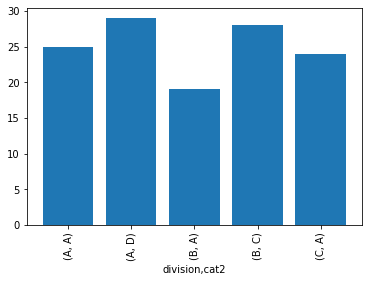

In [28]:
df2.groupby(['division', 'cat2'])['col2'].sum().plot(kind='bar', width = .8)

<AxesSubplot:xlabel='division,cat2'>

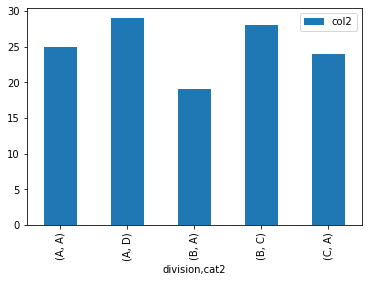

In [20]:
df2.pivot_table(index=['division', 'cat2'], values='col2', aggfunc='sum').plot(kind='bar')

<AxesSubplot:ylabel='col2'>

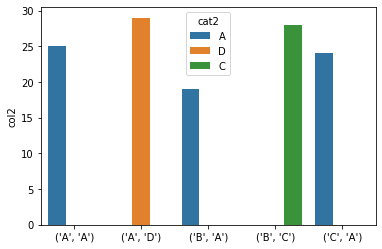

In [21]:
import seaborn as sns

pivot = df2.pivot_table(index=['division', 'cat2'], values='col2', aggfunc='sum').reset_index()
sns.barplot(x=pd.Series(zip(pivot['division'], pivot['cat2'])), y=pivot['col2'], hue=pivot['cat2'])

<AxesSubplot:xlabel='division', ylabel='col2'>

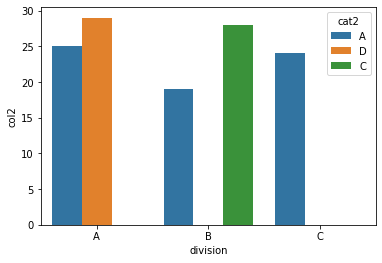

In [22]:
pivot = df2.pivot_table(index=['division', 'cat2'], values='col2', aggfunc='sum').reset_index()
sns.barplot(data=pivot, x='division', y='col2', hue='cat2')